In [1]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd
import operator
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
nations = ['Italy','England','France','Spain','European_Championship','World_Cup']

events = {}
events['England'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/events/events_England.json')
events['Italy'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/events/events_Italy.json')
events['France'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/events/events_France.json')
events['Spain'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/events/events_Spain.json')
events['European_Championship'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/events/events_European_Championship.json')
events['World_Cup'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/events/events_World_Cup.json')

matches = {}
matches['England'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/matches/matches_England.json')
matches['Italy'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/matches/matches_Italy.json')
matches['France'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/matches/matches_France.json')
matches['Spain'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/matches/matches_Spain.json')
matches['European_Championship'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/matches/matches_European_Championship.json')
matches['World_Cup'] = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/matches/matches_World_Cup.json')

teams = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/teams.json')

stadiums = pd.read_excel('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/Stadium field dimensions.xlsx')


In [3]:
Englandshots = events['England']['eventName'] == 'Shot'
shots = events['England'][Englandshots]
all_matches = matches['England']
nationsnoEng = ['Italy','France','Spain','European_Championship','World_Cup']

for nation in nationsnoEng:
    all_matches = pd.concat([all_matches, matches[nation]])
    shotsbool = events[nation]['eventName'] == 'Shot'
    onlyshots = events[nation][shotsbool]
    shots = pd.concat([shots, onlyshots])

In [4]:
shots['x'] = [x[0]['x'] for x in shots['positions']]
shots['y'] = [x[0]['y'] for x in shots['positions']]

In [5]:
players = pd.read_json('/Users/lucastyler/Downloads/Senior Fall/DSCI 303/Project DSCI 303/players.json')

In [6]:
players['position'] = [x['name'] for x in players['role']]

In [7]:
playersprac = players[['firstName', 'lastName', 'height', 'weight', 'shortName', 'foot', 'wyId', 'position']]
shots = pd.merge(shots, playersprac, left_on = 'playerId', right_on = 'wyId')
shots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,...,x,y,firstName,lastName,height,weight,shortName,foot,wyId,position
0,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,...,88,41,Alexandre,Lacazette,175,73,A. Lacazette,right,25413,Forward
1,10,Shot,"[{'id': 402}, {'id': 2101}, {'id': 1802}]",25413,"[{'y': 48, 'x': 87}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,2813.844402,...,87,48,Alexandre,Lacazette,175,73,A. Lacazette,right,25413,Forward
2,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1207}, {'id'...",25413,"[{'y': 34, 'x': 90}, {'y': 0, 'x': 0}]",2499719,Shot,1609,2H,2354.807116,...,90,34,Alexandre,Lacazette,175,73,A. Lacazette,right,25413,Forward
3,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1212}, {'id'...",25413,"[{'y': 33, 'x': 90}, {'y': 100, 'x': 100}]",2499743,Shot,1609,2H,1404.650587,...,90,33,Alexandre,Lacazette,175,73,A. Lacazette,right,25413,Forward
4,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 58, 'x': 82}, {'y': 0, 'x': 0}]",2499749,Shot,1609,1H,1616.714627,...,82,58,Alexandre,Lacazette,175,73,A. Lacazette,right,25413,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36172,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1216}, {'id'...",209091,"[{'y': 41, 'x': 80}, {'y': 100, 'x': 100}]",2058010,Shot,4418,2H,1637.488113,...,80,41,Corentin,Tolisso,181,78,C. Tolisso,right,209091,Midfielder
36173,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1202}, {'id'...",209091,"[{'y': 35, 'x': 87}, {'y': 0, 'x': 0}]",2058014,Shot,4418,2H,3016.680937,...,87,35,Corentin,Tolisso,181,78,C. Tolisso,right,209091,Midfielder
36174,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1215}, {'id'...",101953,"[{'y': 57, 'x': 92}, {'y': 0, 'x': 0}]",2058012,Shot,14358,2H,1590.119521,...,92,57,Aleksandr,Erokhin,195,79,A. Erokhin,right,101953,Midfielder
36175,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1213}, {'id'...",101953,"[{'y': 39, 'x': 94}, {'y': 0, 'x': 0}]",2058012,Shot,14358,E1,844.590203,...,94,39,Aleksandr,Erokhin,195,79,A. Erokhin,right,101953,Midfielder


In [8]:
all_matches['Both_Teams'] = [tuple(x.keys()) for x in all_matches['teamsData']]

all_matches['Team1'] = [x[0] for x in all_matches['Both_Teams']]
all_matches['Team2'] = [x[1] for x in all_matches['Both_Teams']]

shots = pd.merge(shots, all_matches, left_on = 'matchId', right_on = 'wyId')

In [9]:
shots = pd.merge(shots, stadiums, left_on = 'venue', right_on = 'Stadium')
shots
#I believe every row has a Stadium assigned to it

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,...,referees,duration,competitionId,groupName,Both_Teams,Team1,Team2,Stadium,Length,Width
0,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,...,"[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364,NaN,"(1609, 1631)",1609,1631,Emirates Stadium,105,68
1,10,Shot,"[{'id': 402}, {'id': 2101}, {'id': 1802}]",25413,"[{'y': 48, 'x': 87}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,2813.844402,...,"[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364,NaN,"(1609, 1631)",1609,1631,Emirates Stadium,105,68
2,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1207}, {'id'...",25413,"[{'y': 34, 'x': 90}, {'y': 0, 'x': 0}]",2499719,Shot,1609,2H,2354.807116,...,"[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364,NaN,"(1609, 1631)",1609,1631,Emirates Stadium,105,68
3,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,...,"[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364,NaN,"(1609, 1631)",1609,1631,Emirates Stadium,105,68
4,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1213}, {'id'...",26150,"[{'y': 50, 'x': 92}, {'y': 100, 'x': 100}]",2499719,Shot,1631,2H,340.664542,...,"[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364,NaN,"(1609, 1631)",1609,1631,Emirates Stadium,105,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26673,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1214}, {'id'...",28314,"[{'y': 45, 'x': 91}, {'y': 0, 'x': 0}]",2500805,Shot,3795,2H,2510.410593,...,"[{'refereeId': 385496, 'role': 'referee'}, {'r...",Regular,412,NaN,"(3795, 3779)",3795,3779,Stade de l'Aube,105,68
26674,10,Shot,"[{'id': 402}, {'id': 2101}, {'id': 1802}]",26285,"[{'y': 59, 'x': 76}, {'y': 100, 'x': 100}]",2500805,Shot,3779,2H,893.783791,...,"[{'refereeId': 385496, 'role': 'referee'}, {'r...",Regular,412,NaN,"(3795, 3779)",3795,3779,Stade de l'Aube,105,68
26675,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",382,"[{'y': 46, 'x': 92}, {'y': 0, 'x': 0}]",2500805,Shot,3795,2H,129.597324,...,"[{'refereeId': 385496, 'role': 'referee'}, {'r...",Regular,412,NaN,"(3795, 3779)",3795,3779,Stade de l'Aube,105,68
26676,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1216}, {'id'...",339964,"[{'y': 58, 'x': 96}, {'y': 100, 'x': 100}]",2500805,Shot,3779,1H,2666.110510,...,"[{'refereeId': 385496, 'role': 'referee'}, {'r...",Regular,412,NaN,"(3795, 3779)",3795,3779,Stade de l'Aube,105,68


In [10]:
#probably change this variable to distance_perc
shots['distancenoadj'] = np.sqrt(np.power(shots["x"] - 100, 2) + np.power(shots["y"] - 50, 2))
#probably change this variable to distance_m
shots['adjusteddistance'] = np.sqrt(np.power((0.01*shots["x"]*shots["Length"]) 
                                                  - shots["Length"], 2) + 
                                         np.power((0.01*shots["y"]*shots["Width"]) 
                                                  - (0.5*shots["Width"]), 2))

In [11]:
tagvalscol = []
for x in shots['tags']:
    tagvals = []
    for i in range(len(x)):
        tagvals.append(x[i]['id'])
    tagvalscol.append(tagvals)
shots['tagvals'] = tagvalscol

In [12]:
shots['goal'] = [1 if 101 in x else 0 for x in shots['tagvals']]

array([[<AxesSubplot:title={'center':'goal'}>]], dtype=object)

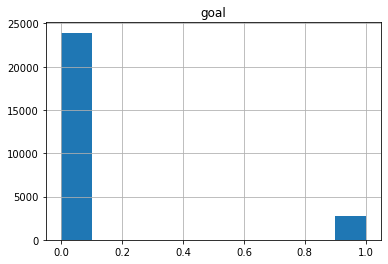

In [13]:
shots.hist('goal')

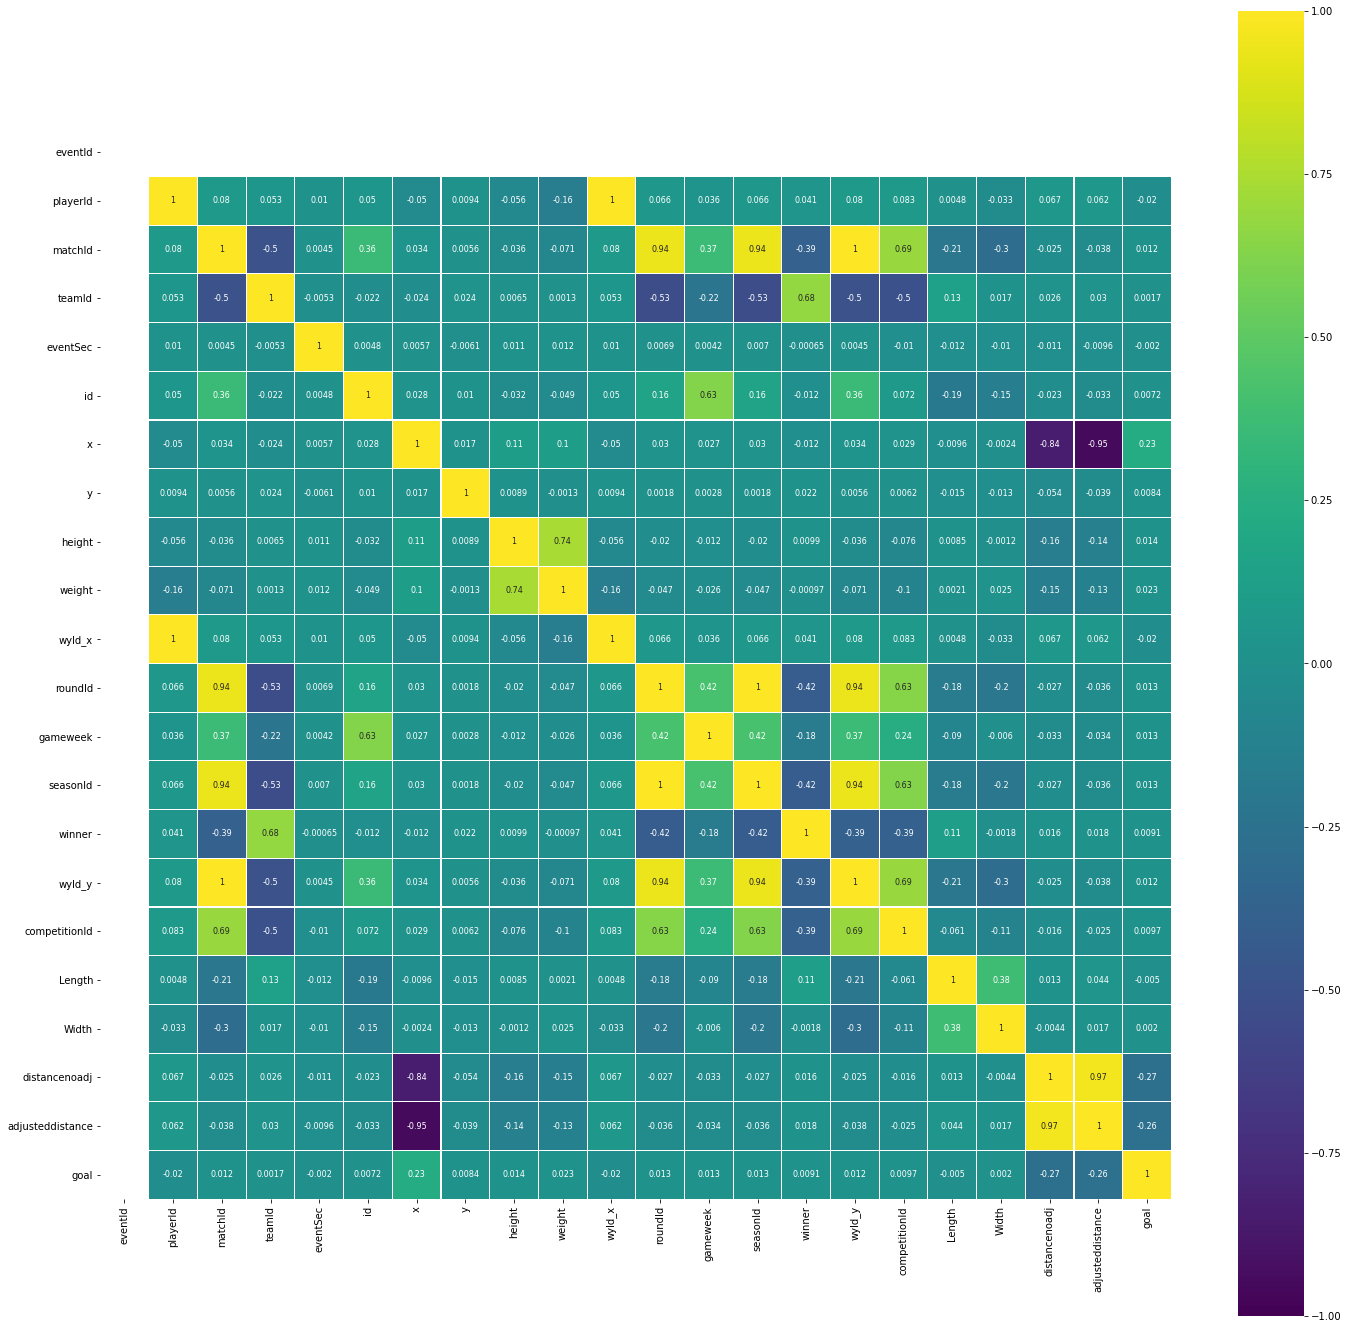

In [14]:
df_corr = shots.corr()
plt.figure(figsize=(24, 24))

sns.heatmap(df_corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [15]:
shots['foot_shot'] = ['right' if 402 in x else 'left' if 401 in x else 'head/body' for x in shots['tagvals']]

In [16]:
#procedure for creating dummy variables is the same as in the below column, can actually add it into the same for loop
#that being said, would there be an issue for adding in only two observations with goalkeeper shots where one is a
#goal? Might the algorithm think its extremely likely for goalkeepers to score when they're shooting when in fact this
#is just because of how few observations we have of goalkeepers shooting? Because of course we assume Forwards are
#most likely to score. But also, is this largely just because they shoot from the most advanced positions, at least
#from the view of the dataset?
positions = ['Forward', 'Midfielder', 'Defender', 'Goalkeeper']
for pos in positions:
    pos_shots = shots[shots['position'] == pos]
    goalsfrompos = pos_shots[pos_shots['goal'] == 1]
    perc_goals = len(goalsfrompos)/len(pos_shots)
    print('The percentage of successful shots from the', pos, 'position in this database is: ', perc_goals)

The percentage of successful shots from the Forward position in this database is:  0.132753371030883
The percentage of successful shots from the Midfielder position in this database is:  0.08165680473372781
The percentage of successful shots from the Defender position in this database is:  0.07793136320305052
The percentage of successful shots from the Goalkeeper position in this database is:  0.5


In [17]:
#1 means the player shot with their strong foot, 0 means they shot with their weak foot or
#with their head/body
strong_foot = []
header = []
for idx, row in shots.iterrows():
    if row['foot_shot'] == row['foot']:
        strong_foot.append(1)
    else:
        strong_foot.append(0)
    if row['foot_shot'] == 'head/body':
        header.append(1)
    else:
        header.append(0)

In [18]:
shots['strong_foot'] = strong_foot
shots['header'] = header

In [19]:
#Add 45*60 seconds to every event in the second half, as eventSec tracks the number of seconds since
#the start of the current half
eventTime = []
for idx, row in shots.iterrows():
    if row['matchPeriod'] == '2H':
        eventTime.append(row['eventSec'] + (45*60))
    else:
        eventTime.append(row['eventSec'])

In [20]:
shots['eventTime'] = eventTime

In [21]:
#add a column for the shot angle
#Looked at a few stadiums in Italy and they all had dimensions of 105*68m
angles = []
for idx, row in shots.iterrows():
    #If shooting from touchline, angle will be zero
    #continue to avoid divide by zero errors
    if row['x'] == 100:
        angles.append(0)
        continue
    #moving everything to left side of the field to make calculation easier
    if row['y'] > 50:
        mirror = 100 - row['y']
    else:
        mirror = row['y']
    #following four lines attempt to adjust to the actual field width and get 
    #more accurate positioning of the goal posts. e.g. Previously had right goal post at 
    #53.6 as opposed to most often at 54.64 which implicitly assumed width was 100 (which
    # is never the case). Thus, divide width by goal length to get percentage of field it takes up
    #and add half that percentage evenly to either side of 50
    goal_perc = row['Width']/7.32
    increment = goal_perc/2
    left_post = 50 - increment
    right_post = 50 + increment
    dist_a = ((row['x'] - 100)**(2))**(1/2)
    dist_b = ((mirror - right_post)**2)**(1/2)
    dist_c = ((mirror - left_post)**2)**(1/2)
    theta = np.arctan(dist_b/dist_a)*(180/math.pi)
    phi = np.arctan(dist_c/dist_a)*(180/math.pi)
    #Different cases for between the goalposts vs. to the left of a goalpost
    if mirror < left_post:
        angles.append(theta - phi)
    else:
        angles.append(theta + phi)
shots['angle'] = angles

In [22]:
y = shots['goal']
X = shots[['eventTime', 'adjusteddistance', 'angle','strong_foot', 'header']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
xGmodel = LogisticRegression(random_state=0).fit(X_train, y_train)

In [25]:
#see if I can use one of their earlier versions of the code to see how the coefficients have changed
#angle effect is much smaller by now
print(xGmodel.coef_)

[[-4.77008270e-06 -1.57726854e-01  8.47702292e-03  3.78226027e-01
  -5.89271899e-01]]


In [26]:
y_pred_train = xGmodel.predict(X_train)
y_pred_test = xGmodel.predict(X_test)

In [27]:
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(xGmodel.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(xGmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on training set: 0.90
Accuracy of logistic regression classifier on test set: 0.89


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

[[5908   21]
 [ 688   53]]


In [36]:
#Reason for this confusion matrix--high accuracy but low recall and f1-score
num_goals = len(shots[shots['goal'] == 1])
num_misses = len(shots[shots['goal'] == 0])
perc_goals = num_goals/len(shots)
perc_misses = num_misses/len(shots)
print('Percentage of goals is: ', perc_goals)
print('Number of goals is', num_goals, ', number of misses is', num_misses)
#Attempt to use SMOTE and undersampling to rectify this
#SMOTE rather than normal oversampling

Percentage of goals is:  0.10311867456331059
Number of goals is 2751 , number of misses is 23927


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      5929
           1       0.72      0.07      0.13       741

    accuracy                           0.89      6670
   macro avg       0.81      0.53      0.54      6670
weighted avg       0.88      0.89      0.85      6670



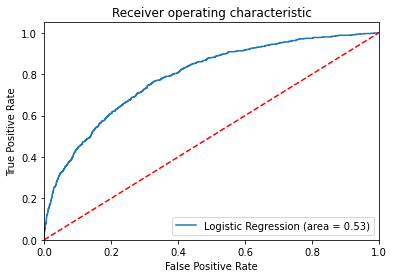

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, xGmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xGmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [31]:
#website for us to compare xG results with: https://understat.com/league/EPL/2017